In [1]:
import qiskit
from qiskit import quantum_info
from qiskit.execute_function import execute
from qiskit import BasicAer
import numpy as np
import pickle
import json
import os
from collections import Counter
from sklearn.metrics import mean_squared_error
from typing import Dict, List
import matplotlib.pyplot as plt

#define utility functions

def simulate(circuit: qiskit.QuantumCircuit) -> dict:
    """Simulate the circuit, give the state vector as the result."""
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    state_vector = result.get_statevector()
    
    histogram = dict()
    for i in range(len(state_vector)):
        population = abs(state_vector[i]) ** 2
        if population > 1e-9:
            histogram[i] = population
    
    return histogram


def histogram_to_category(histogram):
    """This function take a histogram representations of circuit execution results, and process into labels as described in 
    the problem description."""
    assert abs(sum(histogram.values())-1)<1e-8
    positive=0
    for key in histogram.keys():
        digits = bin(int(key))[2:].zfill(20)
        if digits[-1]=='0':
            positive+=histogram[key]
        
    return positive


def count_gates(circuit: qiskit.QuantumCircuit) -> Dict[int, int]:
    """Returns the number of gate operations with each number of qubits."""
    counter = Counter([len(gate[1]) for gate in circuit.data])
    #feel free to comment out the following two lines. But make sure you don't have k-qubit gates in your circuit
    #for k>2
    for i in range(2,20):
        assert counter[i]==0
        
    return counter


def image_mse(image1,image2):
    # Using sklearns mean squared error:
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    return mean_squared_error(image1, image2)

/home/yusharthsingh/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#load the mock data (for testing only)
files=os.listdir("mock_data")
dataset=list()
for file in files:
    with open('mock_data/'+file, "r") as infile:
        loaded = json.load(infile)
        dataset.append(loaded)

FileNotFoundError: [Errno 2] No such file or directory: 'mock_data'

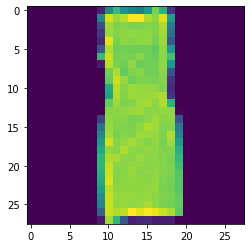

In [3]:
#load the actual hackthon data (fashion-mnist)
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
#you can visualize it
plt.imshow(images[1100])

In [4]:
#submission to part 1, you should make this into a .py file

n=len(dataset)
mse=0
gatecount=0

# Functions 'encode' and 'decode' are dummy.
def encode(image):
    q = qiskit.QuantumRegister(3)
    circuit = qiskit.QuantumCircuit(q)
    if image[0][0]==0:
        circuit.rx(np.pi,0)
    return circuit

def decode(histogram):
    if 1 in histogram.keys():
        image=[[0,0],[0,0]]
    else:
        image=[[1,1],[1,1]]
    return image

def run_part1(image):
    #encode image into a circuit
    circuit=encode(image)

    #simulate circuit
    histogram=simulate(circuit)

    #reconstruct the image
    image_re=decode(histogram)

    return circuit,image_re

In [5]:
#how we grade your submission

n=len(dataset)
mse=0
gatecount=0

for data in dataset:
    #encode image into circuit
    circuit,image_re=run_part1(data['image'])
    
    #count the number of 2qubit gates used
    gatecount+=count_gates(circuit)[2]
    
    #calculate mse
    mse+=image_mse(data['image'],image_re)
    
#fidelity of reconstruction
f=1-mse
gatecount=gatecount/n

#score for part1 
print(f*(0.999**gatecount))

1.0


--------------------------MY CODE--------------------------

In [1]:
import qiskit
from qiskit import quantum_info
from qiskit.execute_function import execute
from qiskit import BasicAer
import numpy as np
import pickle
import json
import os
from collections import Counter
from sklearn.metrics import mean_squared_error
from typing import Dict, List
import matplotlib.pyplot as plt

#define utility functions

def simulate(circuit: qiskit.QuantumCircuit) -> dict:
    """Simulate the circuit, give the state vector as the result."""
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    state_vector = result.get_statevector()
    
    histogram = dict()
    for i in range(len(state_vector)):
        population = abs(state_vector[i]) ** 2
        if population > 1e-9:
            histogram[i] = population
    
    return histogram


def histogram_to_category(histogram):
    """This function take a histogram representations of circuit execution results, and process into labels as described in 
    the problem description."""
    assert abs(sum(histogram.values())-1)<1e-8
    positive=0
    for key in histogram.keys():
        digits = bin(int(key))[2:].zfill(20)
        if digits[-1]=='0':
            positive+=histogram[key]
        
    return positive


def count_gates(circuit: qiskit.QuantumCircuit) -> Dict[int, int]:
    """Returns the number of gate operations with each number of qubits."""
    counter = Counter([len(gate[1]) for gate in circuit.data])
    #feel free to comment out the following two lines. But make sure you don't have k-qubit gates in your circuit
    #for k>2
    for i in range(2,20):
        assert counter[i]==0
        
    return counter


def image_mse(image1,image2):
    # Using sklearns mean squared error:
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    return mean_squared_error(image1, image2)

In [2]:
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')

In [159]:
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, QuantumRegister
from qiskit.qasm import pi
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from qiskit import execute, Aer, BasicAer
import numpy as np
import random
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mutual_info_score, r2_score

dataset=images
n=len(dataset)
mse=0
gatecount=0

# Functions 'encode' and 'decode' are dummy (not anymore).
def encode(image):
    
    #Implementation of MRQI fro 28x28 images
    
    qubit = 12
    q = qiskit.QuantumRegister(qubit)
    qc = qiskit.QuantumCircuit(q)
    
    #Necessary gates for the whole circuit
    
    def rccx(circ, t, c0, c1):
        circ.h(t)
        circ.t(t)
        circ.cx(c0, t)
        circ.tdg(t)
        circ.cx(c1, t)
        circ.t(t)
        circ.cx(c0, t)
        circ.tdg(t)
        circ.h(t)

    def rcccx(circ, t, c0, c1, c2):
        circ.h(t)
        circ.t(t)
        circ.cx(c0, t)
        circ.tdg(t)
        circ.h(t)
        circ.cx(c1, t)
        circ.t(t)
        circ.cx(c2, t)
        circ.tdg(t)
        circ.cx(c1, t)
        circ.t(t)
        circ.cx(c2, t)
        circ.tdg(t)
        circ.h(t)
        circ.t(t)
        circ.cx(c0, t)
        circ.tdg(t)
        circ.h(t)
        
    def mary_8(circ, angle, t, c0, c1, c2, c3, c4, c5, c6):
        angle = float(angle)
        #print(angle)
        circ.h(t)
        circ.t(t)
        rccx(circ, t, c0, c1)
        circ.tdg(t)
        circ.h(t)
        rccx(circ, t, c2, c3)
        circ.rz(angle/4,t)
        rcccx(circ, t, c4, c5, c6)
        circ.rz(-angle/4,t)
        rccx(circ, t, c2, c3)
        circ.rz(angle/4,t)
        rcccx(circ, t, c4, c5, c6)
        circ.rz(-angle/4,t)
        circ.h(t)
        circ.t(t)
        rccx(circ, t, c0, c1)
        circ.tdg(t)
        circ.h(t)
        
    def c10mary(circ, angle, bin, target, anc, controls):
        clist = []

        for i in bin:
            clist.append(int(i))

        for i in range(len(clist)):
            if clist[i] == 0:
                circ.x(controls[-i-1])

        rccx(circ, anc, controls[4], controls[5])
        circ.x(controls[4])
        circ.x(controls[5])
        rccx(circ, controls[4], controls[6], controls[7])
        rccx(circ, controls[5], controls[8], controls[9])


        mary_8(circ, angle, target, anc, controls[0], controls[1], controls[2], controls[3], controls[4], controls[5])

        rccx(circ, controls[5], controls[8], controls[9])
        rccx(circ, controls[4], controls[6], controls[7])
        circ.x(controls[5])
        circ.x(controls[4])
        rccx(circ, anc, controls[4], controls[5])

        for i in range(len(clist)):
                if clist[i] == 0:
                        circ.x(controls[-i-1])
                        
    
    #Apply the whole ciruit with the reshpaed image
    
    image = image.flatten().astype('float64')
                        
    qc.h(range(2,qubit))
    
    
    for i in range(len(image)): #NOT SURE ABOUT THIS
        if image[i] != 0:
            #print(t)
            c10mary(qc, 2 * image[i], format(i, '010b'), 0, 1, [i for i in range(2,12)])
    
    return qc

def decode(histogram, image): #THIS DECODING IS THE ONE FROM THE GITHUB REPO
    
    genimg = np.array([])

    for i in range(len(image)):
        try:
            genimg = np.append(genimg,[np.sqrt(result.get_counts(circuit)[format(i, '010b')+'01']/numOfShots)])
            genimg = np.append(genimg,[])
        except KeyError:
            genimg = np.append(genimg,[0.0])
    
    image = genimg.astype('int')
    
    image = genimg.reshape((28,28)) 
    
    return image

def decode(histogram):
    
    image = np.sqrt(np.array(list(histogram.values())))[0:784]#NOT SURE ABOUT THIS
    image = image.astype('int').reshape((28,28))
    
    return image
    

def run_part1(image):
    #encode image into a circuit
    circuit = encode(image)

    #simulate circuit
    histogram = simulate(circuit)

    #reconstruct the image
    image_re = decode(histogram)

    return circuit,image_re



In [13]:
#images[1100]
#plt.imshow(images[1100])

In [37]:
#images[1100].flatten()

In [22]:
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, QuantumRegister
from qiskit.qasm import pi
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from qiskit import execute, Aer, BasicAer
import numpy as np
import matplotlib.pyplot as plt
#from resizeimage import resizeimage
from PIL import Image

#import frqi
#import quantum_edge_detection as qed

Let's try it with one example

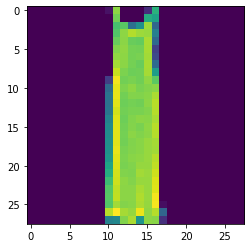

In [168]:
image=images[1000]
plt.imshow(image)

In [169]:
circuit = encode(image)

In [170]:
histogram = simulate(circuit)

In [158]:
#circuit_drawer(circuit)
#print(histogram)
#print(np.array(list(histogram.values())))

In [81]:
image = image.flatten().astype('float64')

In [171]:
image_re = decode(histogram)

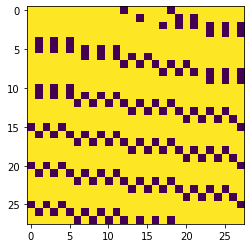

In [172]:
plt.imshow(image_re) #DOES NOT LOOK GOOD AT ALL